In [1]:
from numpy.random import randint
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
group1 = randint(20, 60, 8)
group2 = randint(20, 60, 8)

df = pd.DataFrame({
    "Автобус 1": group1, 
    "Автобус 2": group2,
    }, index = ["9:00 - 11:00", "11:00 - 13:00","13:00 - 15:00", "15:00 - 17:00", "17:00 - 19:00", "19:00 - 21:00", "21:00 - 23:00", "23:00 - 01:00"])

df.index.name = 'Рейс'
df.columns.name = 'Кількість пасажирів'
df

Кількість пасажирів,Автобус 1,Автобус 2
Рейс,,
9:00 - 11:00,50,28
11:00 - 13:00,27,34
13:00 - 15:00,39,39
15:00 - 17:00,22,37
17:00 - 19:00,48,46
19:00 - 21:00,51,42
21:00 - 23:00,33,58
23:00 - 01:00,28,29


[]

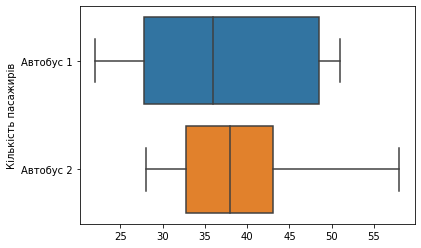

In [3]:
sns.boxplot(data = df, orient = 'h').set()

In [5]:
def Pirson(x, y):
    n = len(x)
    r = ( sum(x * y) - n * (sum(x)/n) * (sum(y)/n) ) / ( n * ( ( ( sum(x**2)/n - (sum(x)/n)**2 ) * ( sum(y**2)/n - (sum(y)/n)**2) ) )**(1/2) )
    print("Значення коефіцієнту кореляції: " + str(r))
    
    df = n - 2
    print("Значення ступеня свободи: " + str(df))
    
    read = pd.read_excel("CriticalTable.xlsx")
    table = read.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту кореляції = " + str(table))
    
    if abs(r) > table:
        result = "significant"
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
    
    return r, df, result

In [8]:
def Student(x, y):
    d = x - y
    n = len(x)
    M = d.mean()
    sigma = d.std()
    t = (M/sigma) * (n)**(1/2)
    print("Значення t-критерію Стьюдента: t = "  + str(t))
    
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    
    read = pd.read_excel("CriticalTable.xlsx")
    table = read.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту Стьюдента = " + str(table))
    
    if abs(t) > table:
        result = "significant"
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
    
    return t, df, result

In [10]:
Pirson(group1, group2)


Значення коефіцієнту кореляції: 0.08932918947638802
Значення ступеня свободи: 6
Критичне значення коефіцієнту кореляції = 2.447
Результат оцінки значимості зв'зку: not significant


(0.08932918947638802, 6, 'not significant')

In [9]:
Student(group1, group2)

Значення t-критерію Стьюдента: t = -0.3951646670439883
Значення ступеня свободи: df = 7
Критичне значення коефіцієнту Стьюдента = 2.365
Результат оцінки значимості зв'зку: not significant


(-0.3951646670439883, 7, 'not significant')